# Homework 2: Discovery of Frequent Itemsets and Association Rules
Authors: Tori Leatherman & Eva Engel \
Date: 21st November 2022

# Task
The task can be divided into two sub-problem: 
1. (A-Priori Algorithm) Find frequent itemsets with support at least *s_threshold*.
1. Generate association rules with confidence at least *c_threshold* from the itemsets found in the first step.

Our code reproduces the algorithm that was introduced by R. Agrawal and R. Srikant in [Fast Algorithms for Mining Association Rules](https://www.vldb.org/conf/1994/P487.PDF).


## Set up 
1. *pip install -r /path/to/requirements.txt*


### Import

In [1]:
from itertools import combinations
import matplotlib.pyplot as plt

from apriori import Apriori
from association_rule_finder import AssociationRuleFinder
from dataset_reader import read_transactions

### Data Set

In [2]:
dataset_file = 'T10I4D100K.dat'
transactions = read_transactions(dataset_file)
print(f"Data set contains {len(transactions)} transactions and {len(set.union(*transactions))} unique items.")

Data set is load.
Data set contains 100000 transactions and 870 unique items.


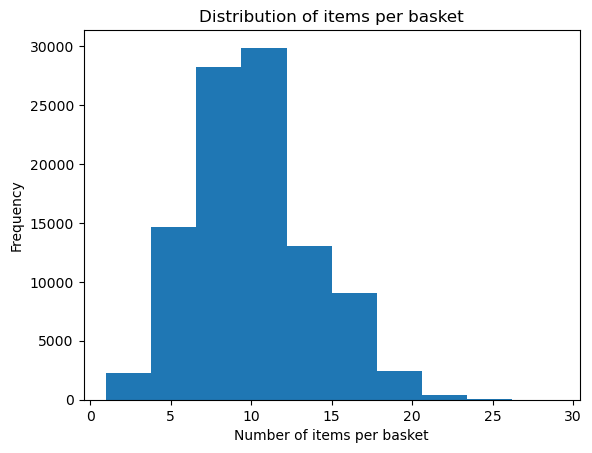

In [3]:
# Distribution of items per basket

nof_items= [len(transaction) for transaction in transactions]
plt.hist(nof_items)
plt.title('Distribution of items per basket')
plt.xlabel('Number of items per basket')
plt.ylabel('Frequency')
plt.show()

# Frequent items (A-Priori Algorithm)
The A-Priori algorithm is an algorithm developed to find frequent itemsets. It is unique in that it limits the memory usage, making it a preferred method for large datasets. In order to limit the memory, the A-Priori algorithm is based on the concept of **Monotonicity of Support**, which can be defined as follows: the support of an itemset is at least large as the support of its superset. Thus we need only evaluate supersets if its subsets are frequent. This creates a k-pass approach. The first pass is dedicated to counting individual items. Each subsequent k-th pass, will find frequent itemsets of size k. Thus, the second pass will create candidates out of combinations from the 1st pass, and determine if any of the candidates are frequent. This is continued until the threshold is no longer met.

The inputs into the algorithm are baskets of items, in our case these are the transactions, and the s_threshold, which we set to 90%. This means that we are assuming 10% of the itemsets in the transactions are frequent and filter accordingly. The output of this algorithm are the frequent sets, ranging from size 1 (singletones) to 6.

In [5]:
finder = Apriori(transactions, s_threshold=0.9)
k_frequent_items = finder.apriori()

The support threshold is 2695.0000000000005
1st Pass: Frequent items = 87
2th Pass: Candidates = 3741


TypeError: Apriori.filter_frequent_item_sets() got an unexpected keyword argument 'k_itemsets'

### Get the largest itemset with the highest support

In [ ]:
max_k = len(list(k_frequent_items.keys())[-1])

In [ ]:
max_k_itemset = {k: v for k,v in k_frequent_items.items() if len(k) == max_k}
max_k_itemset

In [ ]:
for k in range(1,max_k+1):

    supports = [val for key,val in k_frequent_items.items() if len(key) == k]
    plt.hist(supports)
    plt.xlabel('Support for each frequent item')
    plt.ylabel('Frequency')
    plt.title(f'Frequent item sets with length {k}')
    plt.show()

# Association rules

In this subproblem, we are finding all association rules with support of at least s_threshold, and confidence of at least c_threshold. We use the same support threshold as mentioned above, where 90% means that we assume  10% of items are frequent and filter accordingly. According to the lecture, we assume a confidence threshold of 50% in order for the rule to have a practical effect.

Our Association Rule Finder functions as follows:
- Find all frequent itemsets, *I* with at least given support s_threshold.
- For each subset *A* of *I*, we generate a rule such that *A* -> *I* \ *A*
    - We then compute the confidence of this rule using the following formula:
    conf( *I* -> *I* / *A*) = supp(*I*) / supp(*A*)
- Return all rules that are above the confidence threshold

In [ ]:
rule_finder = AssociationRuleFinder()
rules = rule_finder.find_rules(k_frequent_items)

In [ ]:
# Return all association rules and their corresponding confidence levels
sorted(((v,k) for k,v in rules.items()), reverse=True)

# Experiments

## Monotonicity of support
The following shows that the support of a set is at least as large as the support of its subsets. We take the largest and most frequent item set and show that its subsets have a greater support. 

In [ ]:
max_k_support= max(max_k_itemset, key=lambda k: max_k_itemset[k])
print(max_k_support, max_k_itemset[max_k_support])


In [ ]:
# Returns each frequent itemset and its corresponding support
for k_length in range(1, len(max_k_support)):
    for subset in [frozenset(combination) for combination in combinations(max_k_support, k_length)]:
        print(subset, k_frequent_items.get(subset))
    print('----------------------------------')
print(max_k_support, max_k_itemset[max_k_support])